In [ ]:
!pip install seaborn==0.12.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

**Data Preparation**

In [ ]:
# @title
df=pd.read_csv("/Amazon Sale Report.csv");
df.head()
df.shape
df.tail()
df.info()
df.drop(['New','PendingS','fulfilled-by'],axis=1,inplace=True)
print(df)
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())
df['ship-postal-code']=df['ship-postal-code'].astype(str);
df.describe()


<ipython-input-7-3212d344de8c>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Amazon Sale Report.csv");


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42529 entries, 0 to 42528
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               42529 non-null  int64  
 1   Order ID            42529 non-null  object 
 2   Date                42529 non-null  object 
 3   Status              42529 non-null  object 
 4   Fulfilment          42528 non-null  object 
 5   Sales Channel       42528 non-null  object 
 6   ship-service-level  42528 non-null  object 
 7   Category            42528 non-null  object 
 8   Size                42528 non-null  object 
 9   Courier Status      42528 non-null  object 
 10  Qty                 42528 non-null  float64
 11  currency            39950 non-null  object 
 12  Amount              39950 non-null  float64
 13  ship-city           42513 non-null  object 
 14  ship-state          42513 non-null  object 
 15  ship-postal-code    42513 non-null  float64
 16  ship

,index,Qty,Amount
count,39935.000000,39935.000000,39935.000000
mean,21278.425642,0.955928,624.593638
std,12276.624127,0.227918,272.237796
min,0.000000,0.000000,0.000000
25%,10652.500000,1.000000,432.000000
50%,21270.000000,1.000000,568.570000
75%,31935.500000,1.000000,771.000000
max,42526.000000,8.000000,5584.000000


**Data Visualization**

In [ ]:
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')


<Axes: xlabel='Size', ylabel='count'>

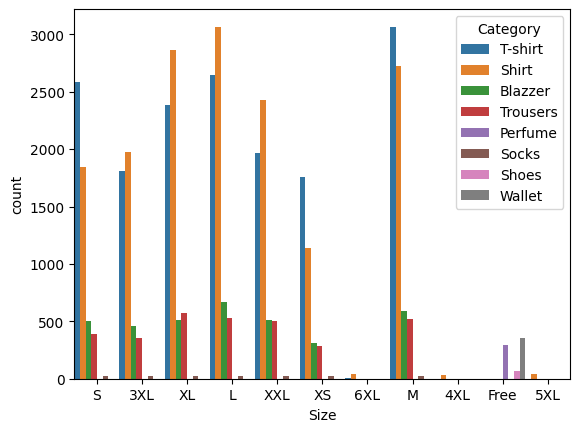

In [ ]:
sns.countplot(x='Size',data=df,hue='Category',width=1)

*Sizewise Sales*

<ipython-input-40-10cfd102d276>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Category',data=df,palette='Set2');


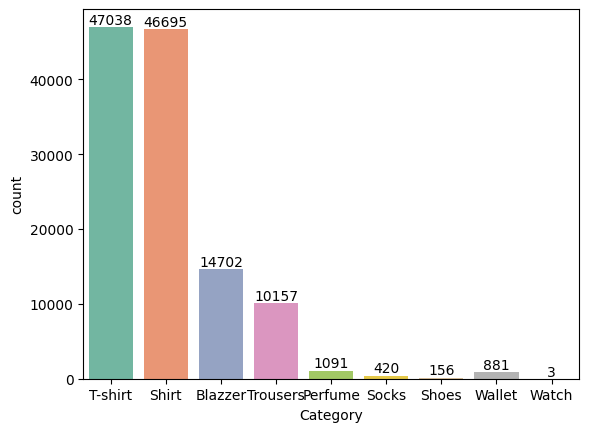

In [ ]:
ax=sns.countplot(x='Category',data=df,palette='Set2');
for i in ax.containers:
    ax.bar_label(i);

*T-shirts & Shirts got sold more*

*Watch & shoes have lowest number of sales*



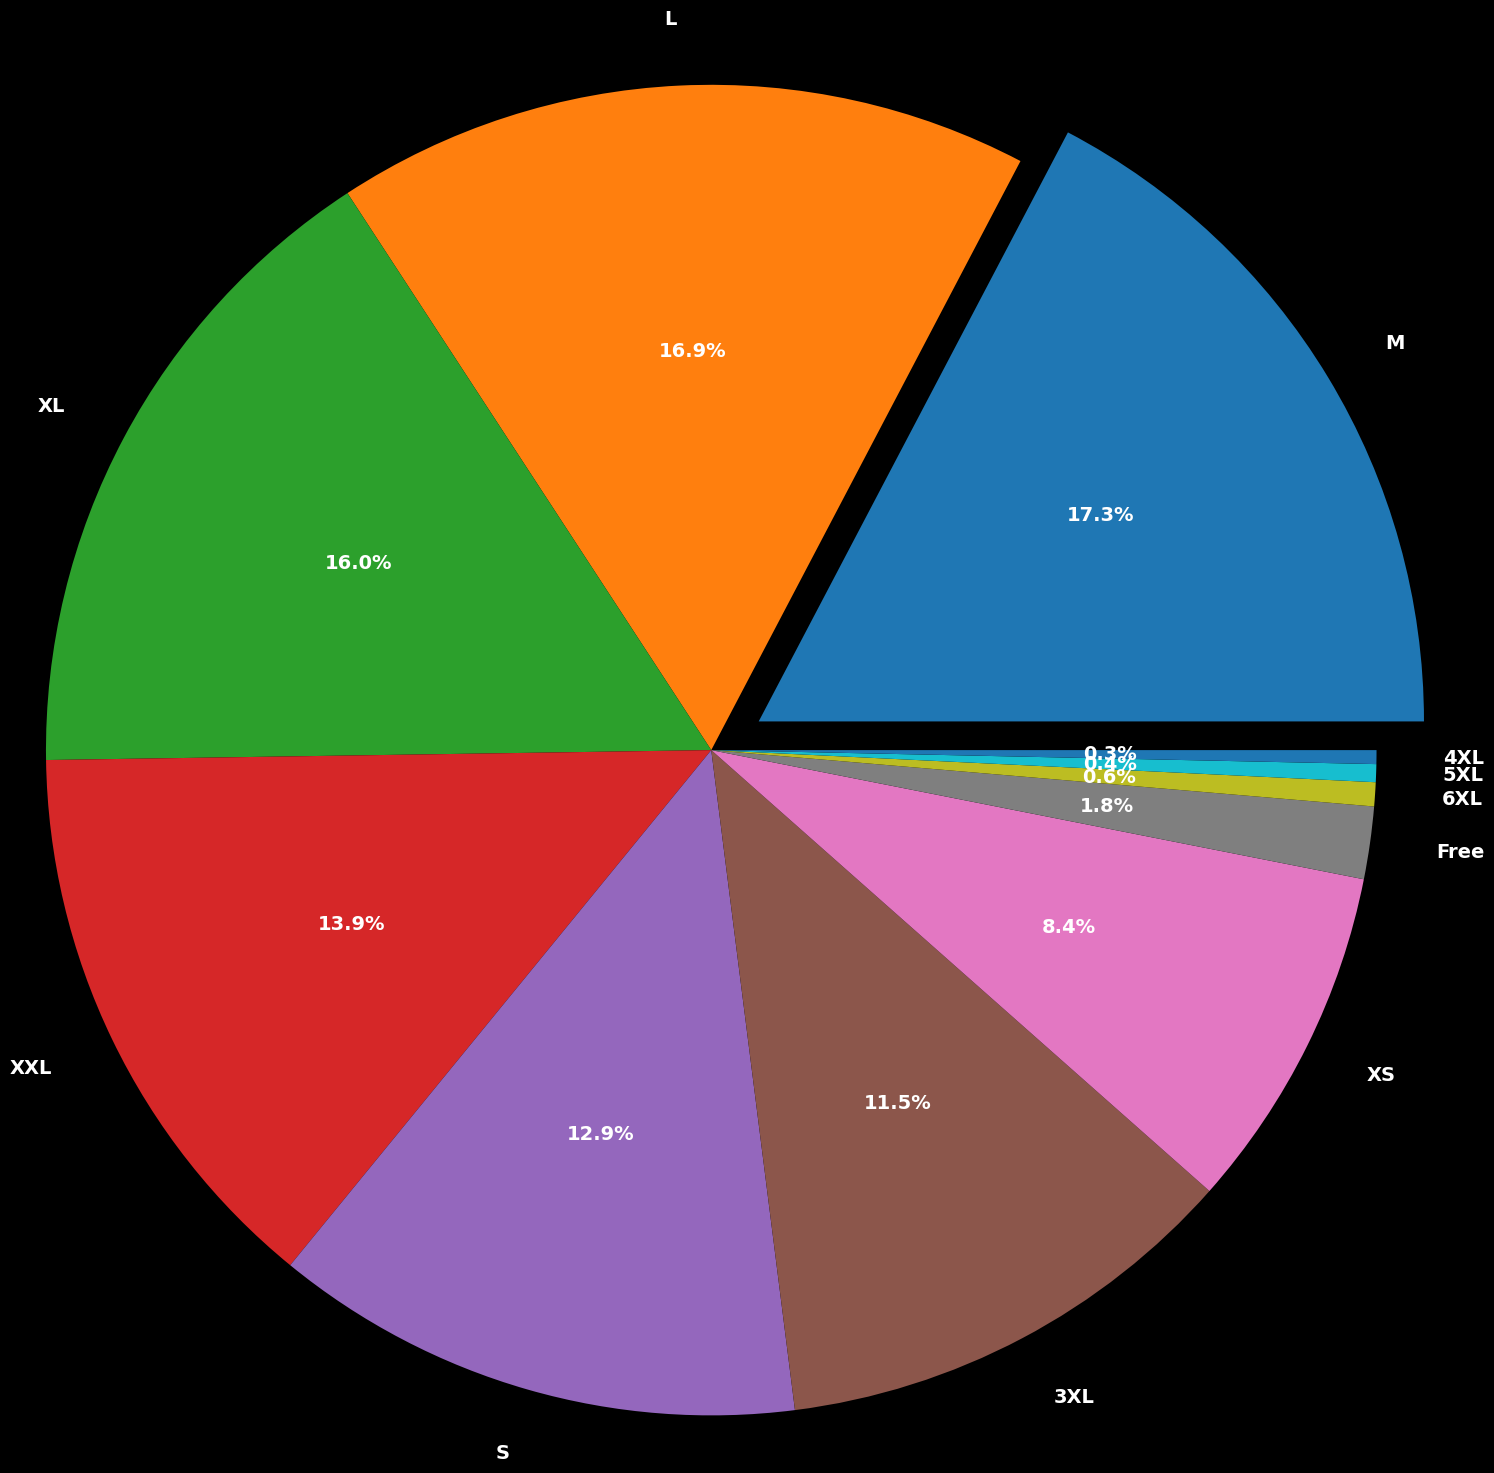

In [ ]:
plt.figure(figsize=(20,18),facecolor='black')
plt.pie(df['Size'].value_counts(),labels=df['Size'].value_counts().index,autopct='%1.1f%%',textprops={'color':'w','weight':'bold','fontsize':14},radius=1.2,explode=[0.1,0,0,0,0,0,0,0,0,0,0]);

*M>L>XL has most buyers*

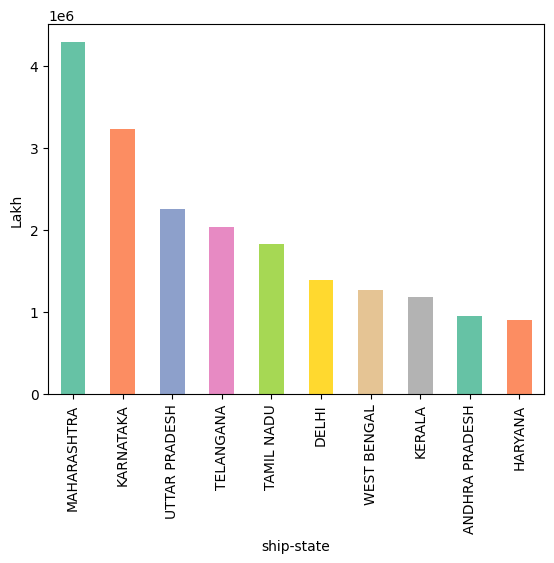

In [ ]:
# @title
df.groupby(['ship-state'])['Amount'].sum().nlargest(10).plot(kind='bar',color=sns.color_palette('Set2'),ylabel="Lakh");

*Maharashtra has highest amount contribution in sells*

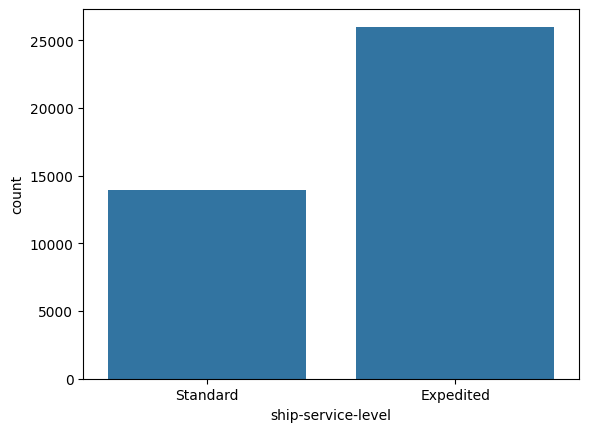

In [ ]:
sns.countplot(x='ship-service-level',data=df);

*Expedited has more count*

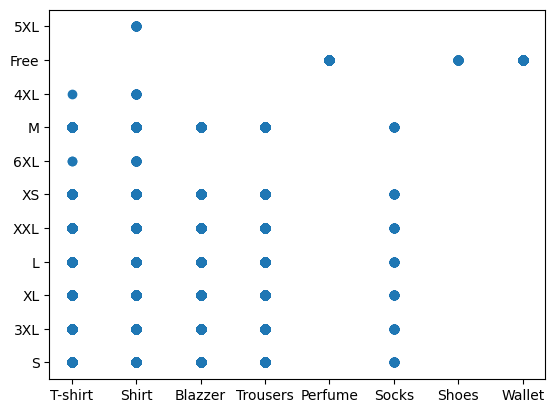

In [ ]:
plt.scatter(df['Category'],df['Size']);

*Item vs Size Availiblity*

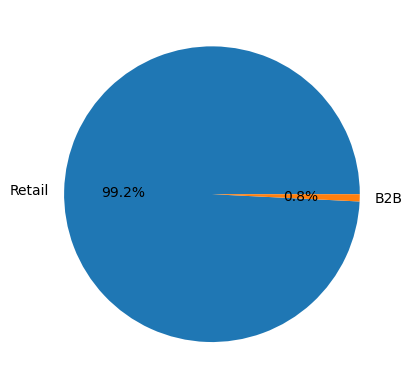

In [ ]:
plt.pie(df['B2B'].value_counts(),autopct='%1.1f%%',labels=["Retail",'B2B']);


*Retail vs B2B*